# Customer Churn Analysis 

## Classification Algorithms - Nearest Neighbors & Decision Tree

## 1 Introduction 

In this document we will build a model to analyze the customer churn, which means to understand what keeps the customer engaged to our product. 

Its analysis goal is to describe the churn rate using tow machine learning models for customer churn prediction on data from a Telecom company. This case is partially inspired in Eric Chiang's analysis of churn rate. 

Data is available from the University of California Irvine machine learning repositories data set. The name of the dataset is "churn.csv" and it is available in the Files folder of this repository.

## 2 Import Required Packages 

In [1]:
import numpy as np #vectors and arrays operations
import pandas as pd  #data management and data analysis
import seaborn as sn # data visualization
import matplotlib.pyplot as plt # data visualization
import sklearn #machine learning library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report #sklearn metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#standarscaler => pre-processing

#open a new window and display the graphics in that way
%matplotlib inline 

## 3 Explore the data 

In [2]:
#load the dataset
import pandas as pd 
churn = pd.read_csv('churn.csv')
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


We can see that each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

The complete set of attributes is the following:

* State: categorical, for the 50 states and the District of Columbia
* Account length: integer-valued, how long an account has been active
* Area code: categorical
* Phone number: customer ID
* International Plan: binary feature, yes or no
* VoiceMail Plan: binary feature, yes or no
* Number of voice mail messages: integer-valued
* Total day minutes: continuous, minutes customer used service during the day
* Total day calls: integer-valued
* Total day charge: continuous
* Total evening minutes: continuous, minutes customer used service during the evening
* Total evening calls: integer-valued
* Total evening charge: continuous
* Total night minutes: continuous, minutes customer used service during the night
* Total night calls: integer-valued
* Total night charge: continuous
* Total international minutes: continuous, minutes customer used service to make international calls
* Total international calls: integer-valued
* Total international charge: continuous
* Number of calls to customer service: integer-valued

In [3]:
#check all the title columns of the dataset
col_names = churn.columns.tolist()
print ("Column names:")
print (col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [4]:
#build the sample to analyse
to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn[to_show].head(6)


Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


## 4 Data Processing 

### 4.1 Convert Categorical data to Boolean 

In [5]:
#Convert Churn? data to boolean
#False. =>> 0
#True. =>> 1
churn = pd.get_dummies(churn, columns = ['Churn?'], drop_first = True)

In [6]:
churn.head(15)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?_True.
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [7]:
#Convert 'Int'l Plan' and 'VMail Plan' data to boolean
#no =>> 0
#yes =>> 1
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn = pd.get_dummies(churn, columns = yes_no_cols, drop_first = True)

In [8]:
churn.head(15)

,State,Account Length,Area Code,Phone,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?_True.,Int'l Plan_yes,VMail Plan_yes
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
5,AL,118,510,391-8027,0,223.4,98,37.98,220.6,101,...,203.9,118,9.18,6.3,6,1.70,0,0,1,0
6,MA,121,510,355-9993,24,218.2,88,37.09,348.5,108,...,212.6,118,9.57,7.5,7,2.03,3,0,0,1
7,MO,147,415,329-9001,0,157.0,79,26.69,103.1,94,...,211.8,96,9.53,7.1,6,1.92,0,0,1,0
8,LA,117,408,335-4719,0,184.5,97,31.37,351.6,80,...,215.8,90,9.71,8.7,4,2.35,1,0,0,0
9,WV,141,415,330-8173,37,258.6,84,43.96,222.0,111,...,326.4,97,14.69,11.2,5,3.02,0,0,1,1


In [9]:
#remove unnecessary columns
to_drop = ['State','Phone']
churn_df = churn.drop(to_drop, axis = 1)
churn_df.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?_True.,Int'l Plan_yes,VMail Plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


### 4.2 Response and Feature Variables 

In [10]:
X = churn_df.drop('Churn?_True.', axis = 1) # X variable = store the data
y = churn_df['Churn?_True.'] # y variable = store the classes/targets

In [11]:
X.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan_yes,VMail Plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?_True., dtype: uint8

In [13]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


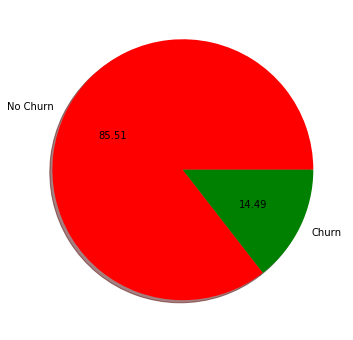

In [14]:
#Visualization of the churn rate
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

Comments =>> We can see that this dataset is unbalanced, because only the 14.49% has a customer churn, while a total of 85.51% has no customer churn. To measure performance in those data sets, one has to use other performance metrics, such as specificity or positive predictive value in the minority class.

### 4.3 Training and Test Split 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape

(2666, 18)

In [17]:
X_test.shape

(667, 18)

Now, let's standardize the category units with the StandardScaler() object, which unifies the weighting of the variables. So, we avoid that the model gives more relevance to one variable than another. This is useful when the dataframe has very scattered data.

In [18]:
#Applying Standard Scaling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #perform the transformation
X_test = sc.transform(X_test)

## 5 Prediction and Evaluation 

### 5.1 Nearest Neighbours 

#### 5.1.1 Choose the best value for K 

([<matplotlib.axis.XTick at 0x1b062539470>,
 <a list of 5 Text xticklabel objects>)

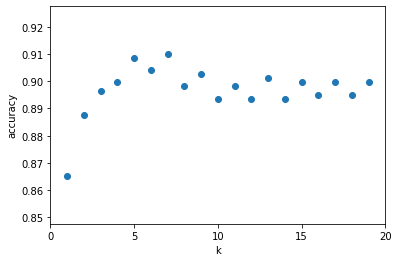

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics

#choose the best value for K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Comments =>> We can see that the best value for K is 5 (K=5)

#### 5.1.2 Build the model 

In [20]:
#build the model
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.91


Comments =>> We have an accuracy of 92% in the training set, while in the test set we have an accuracy of 91%. Both results are quite good.

In [21]:
#predict the values for the test data 
y_pred = knn.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

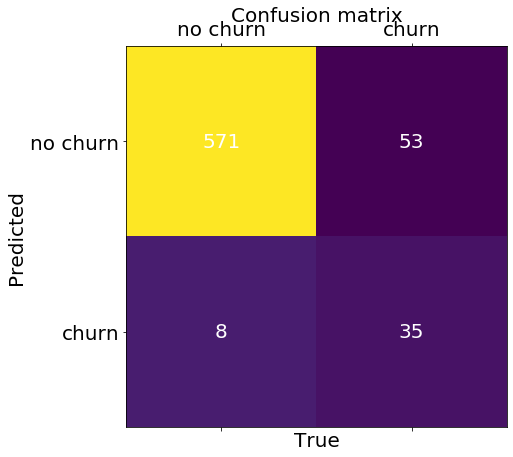

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       579
           1       0.81      0.40      0.53        88

    accuracy                           0.91       667
   macro avg       0.86      0.69      0.74       667
weighted avg       0.90      0.91      0.89       667



In [22]:
#viusalize the confusion matrix and classification report
def draw_confusion(y_test,y_pred,labels):
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y_test,y_pred,['no churn', 'churn'])
print (metrics.classification_report(y_test,y_pred))

### 5.2 Decision Tree 

#### 5.2.1 Apply the Decision Tree Classifier 

In [23]:
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold

# Desired number of "folds" that we will do
cv = KFold(n_splits=5) 
accuracies = list()
max_attributes = len(list(churn_df))
depth_range = range(1, max_attributes + 1)

# Test the depth
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(churn_df):
        f_train = churn_df.loc[train_fold] 
        f_valid = churn_df.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['Churn?_True.'], axis=1), 
                               y = f_train["Churn?_True."]) 
        valid_acc = model.score(X = f_valid.drop(['Churn?_True.'], axis=1), 
                                y = f_valid["Churn?_True."]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Show the results
df_results = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df_results = df_results[["Max Depth", "Average Accuracy"]]
print(df_results.to_string(index=False))
 

 Max Depth  Average Accuracy
         1          0.846089
         2          0.856574
         3          0.855084
         4          0.896184
         5          0.925290
         6          0.933391
         7          0.925287
         8          0.926188
         9          0.919585
        10          0.914183
        11          0.913883
        12          0.908784
        13          0.909384
        14          0.903984
        15          0.896782
        16          0.893181
        17          0.889584
        18          0.885683
        19          0.885382


Comments =>> We can see that in the levels 6/7/8 of splits we have the highest score, with almost 93%.

In [26]:
# Build the decession tree with a depth of 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})


#Apply the Decession Tree Classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1: 3.5}, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
#predict the values for the test data 
y_pred = decision_tree.predict(X_test)

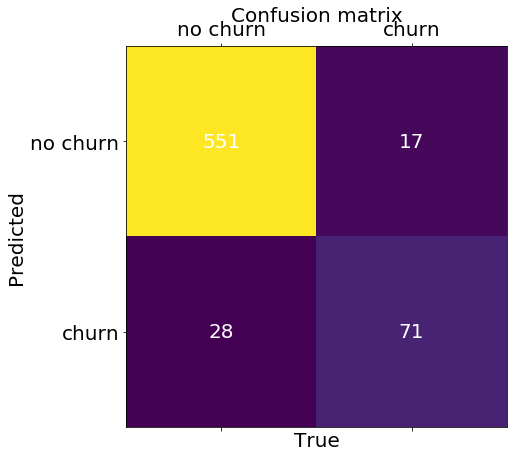

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       579
           1       0.72      0.81      0.76        88

    accuracy                           0.93       667
   macro avg       0.84      0.88      0.86       667
weighted avg       0.94      0.93      0.93       667



In [28]:
#viusalize the confusion matrix and classification report
import matplotlib.pyplot as plt
def draw_confusion(y_test,y_pred,labels):
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y_test,y_pred,['no churn', 'churn'])
print (metrics.classification_report(y_test,y_pred))

In [40]:
# Export the model to a .dot
import os  #manipulate data and directories structures (read and write files)
from sklearn.tree import export_graphviz #method that allows export the decession tree results to a dot file
from pydotplus import graph_from_dot_data #build the graph and export to PNG

dot_data = export_graphviz(decision_tree,
                              out_file= 'churn.dot',
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(churn_df.drop(['Churn?_True.'], axis=1)),
                              rounded = True,
                              filled= True )

In [37]:
#convert dot to png
import os
os.system("dot -Tpng churn.dot -o churn.png")

1

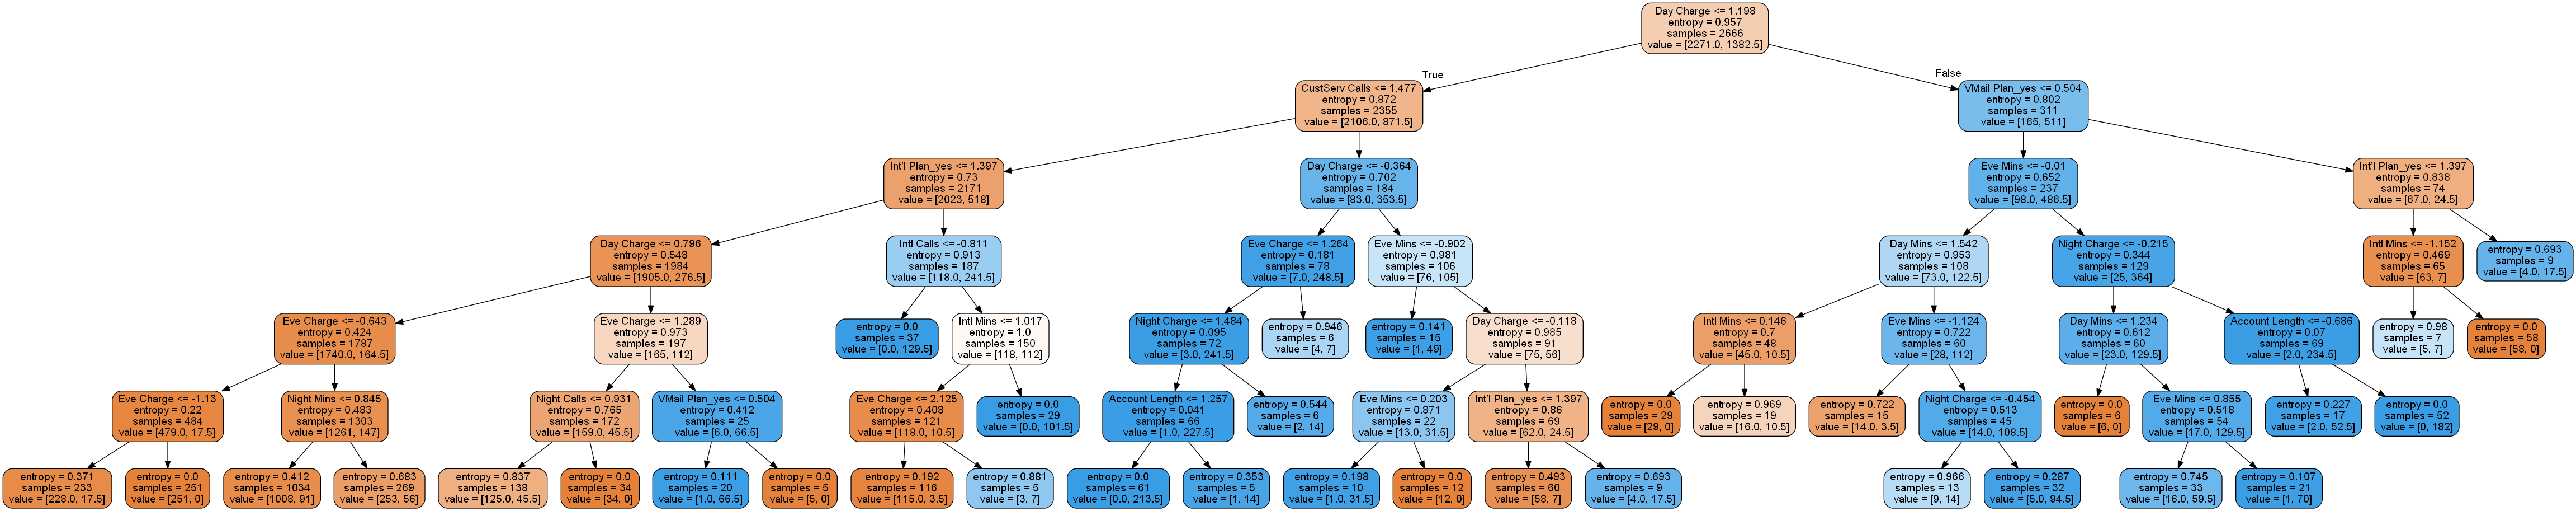

In [41]:
#visualize the decesion tree
from IPython.core.display import Image
Image("churn.png")

In [43]:
#check the precission of the decession tree
accuracy = round(decision_tree.score(X_train, y_train) * 100, 2)
print(accuracy)

95.27


### 5.3 Conclussions 

After finishing our anlysis, we can conclude that the Decision Tree classifier built a more precise model compared to the Nearest Neighbour Classifier, as we have an accuracy of 93% and only a total of 17 Fasle Positives, while in the Nearest Neighbour we have an accuracy of 91% and a total of 53 False Positives (a high amount that should be reduced).    